### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [5]:
df = pd.read_excel('https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [8]:
# Fill NaN values with an empty string
df.fillna('N/A', inplace=True)

# Recheck for null values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-ac93d02e4da4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna('N/A', inplace=True)
<ipython-input-8-ac93d02e4da4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('N/A', inplace=True)


,0
KD_SBR,0
TP_TRN,0
KDSUP,0
KAS,0
TRN_DK,0
...,...
TP_ADJ,0
USER,0
TANGGAL,0
JAM,0


In [9]:
# Ensure the 'TGL_TRANS' column is in datetime format
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

# Drop rows where 'TGL_TRANS' could not be converted
df = df.dropna(subset=['TGL_TRANS'])

# Extract time-related features from 'TGL_TRANS'
df['time'] = df['TGL_TRANS'].dt.time
df['hour'] = df['TGL_TRANS'].dt.hour
df['day'] = df['TGL_TRANS'].dt.day
df['month'] = df['TGL_TRANS'].dt.month
df['year'] = df['TGL_TRANS'].dt.year
df['day_name'] = df['TGL_TRANS'].dt.day_name()

# Define periods of the day based on the hour
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['period_day'] = df['hour'].apply(get_period)

# Classify as weekday or weekend
df['weekday_weekend'] = df['day_name'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')

# Display a sample of the modified dataframe
df.sample(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,JAM,LAMA_CRD,time,hour,day,month,year,day_name,period_day,weekday_weekend
110132,IN,JUL,999.0,6.0,K,A,AREA,N/A,ASESORS,50614.0,...,19:53:19,N/A,00:00:00,0,24,1,2017,Tuesday,night,weekday
42668,IN,JUL,N/A,1.0,K,A,AREA,N/A,SABUNCP,14551.0,...,20:51:15,N/A,00:00:00,0,8,1,2017,Sunday,night,weekend
29314,IN,JUL,N/A,3.0,K,A,AREA,N/A,SOFTENR,531.0,...,10:36:07,N/A,00:00:00,0,6,1,2017,Friday,night,weekday
2578,IN,JUL,N/A,1.0,K,A,AREA,N/A,PERMEN,9900.0,...,15:42:22,N/A,00:00:00,0,1,1,2017,Sunday,night,weekend
88690,IN,JUL,999.0,3.0,K,A,AREA,N/A,AIR.M,5225.0,...,17:12:22,N/A,00:00:00,0,19,1,2017,Thursday,night,weekday


In [10]:
# Get unique weekday names (transactions on weekdays)
unique_weekdays = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()

# Get unique weekend names (transactions on weekends)
unique_weekends = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

# Display the results
print("Unique weekday names:", unique_weekdays)
print("Unique weekend names:", unique_weekends)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


# 1.1 Key Metric

1. Total Transactions Per Day:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


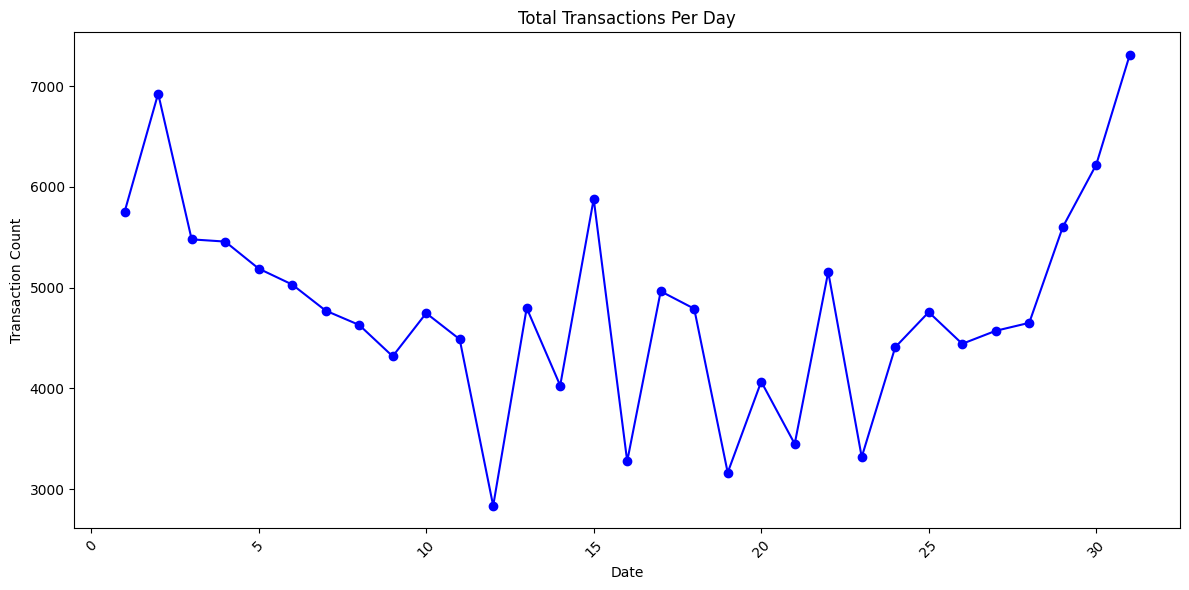

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed

# 1. Total Transactions Per Day
daily_transactions = df.groupby('day').size()
print("1. Total Transactions Per Day:")

# Visualization: Plot Total Transactions Per Day
plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line', marker='o', color='b')
plt.title('Total Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2. Total Revenue: 8725925528.04


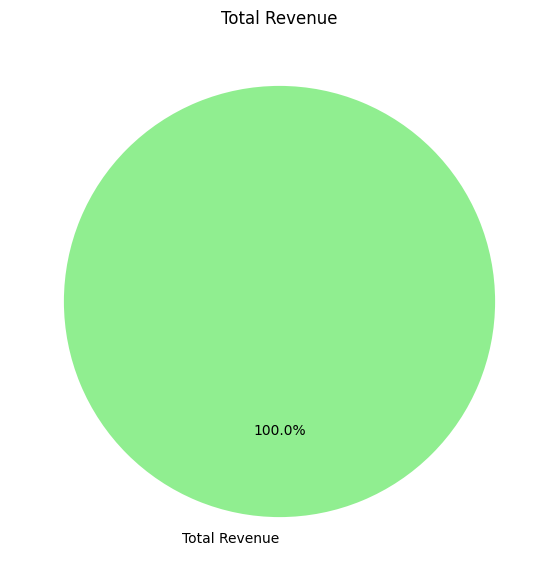

In [12]:
# 2. Total Revenue (based on 'HRG_PKK' - Price per unit and 'QTY' - Quantity sold)
df['revenue'] = df['HRG_PKK'] * df['QTY']
total_revenue = df['revenue'].sum()
print(f"\n2. Total Revenue: {total_revenue:.2f}")

# Visualization: Pie chart for total revenue
plt.figure(figsize=(7, 7))
plt.pie([total_revenue], labels=['Total Revenue'], autopct='%1.1f%%', startangle=90, colors=['lightgreen'])
plt.title('Total Revenue')
plt.show()


In [13]:
# 3. Customer Purchase Behavior
unique_customers = df['USER'].nunique()
avg_purchase_per_customer = df.groupby('USER')['revenue'].sum().mean()
print(f"\n3. Customer Purchase Behavior:")
print(f"   - Number of Unique Customers: {unique_customers}")
print(f"   - Average Purchase Value per Customer: {avg_purchase_per_customer:.2f}")


3. Customer Purchase Behavior:
   - Number of Unique Customers: 22
   - Average Purchase Value per Customer: 396632978.55


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1.2 Seasonal Insight

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Daily Sales Trend in January:


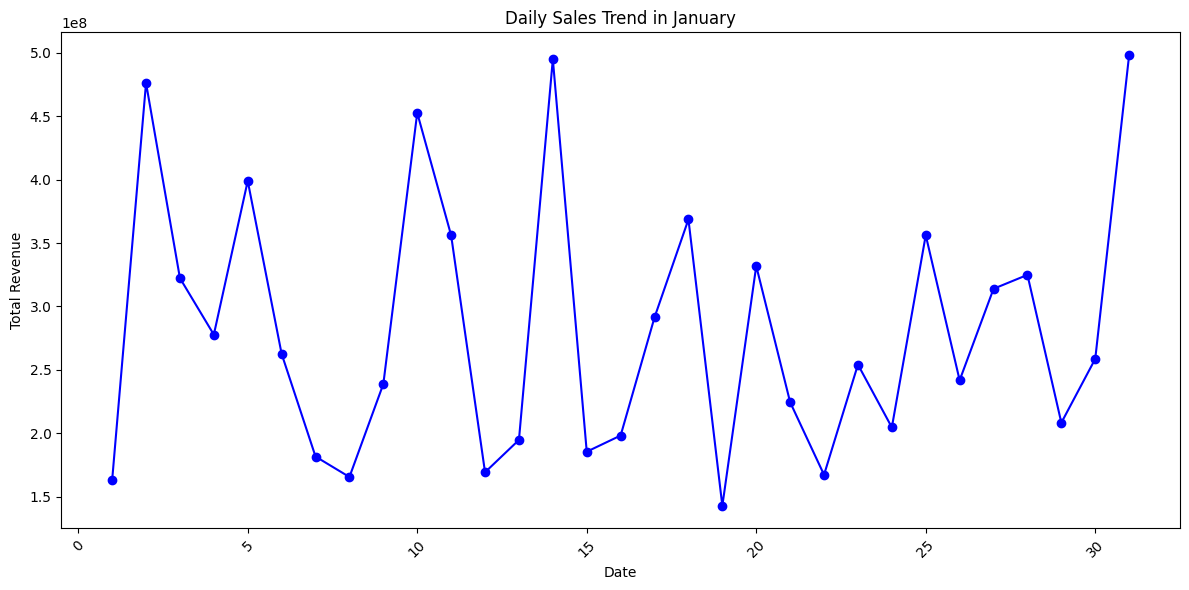

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for January
january_data = df[df['month'] == 1]

# 1. Sales Trend in January (Daily Sales)
january_daily_sales = january_data.groupby('day')['revenue'].sum()

# Print daily sales trend in January
print("1. Daily Sales Trend in January:")

# Visualization: Line plot for daily sales in January
plt.figure(figsize=(12, 6))
january_daily_sales.plot(kind='line', marker='o', color='b')
plt.title('Daily Sales Trend in January')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Top 10 Selling Products (by Total Quantity Sold):


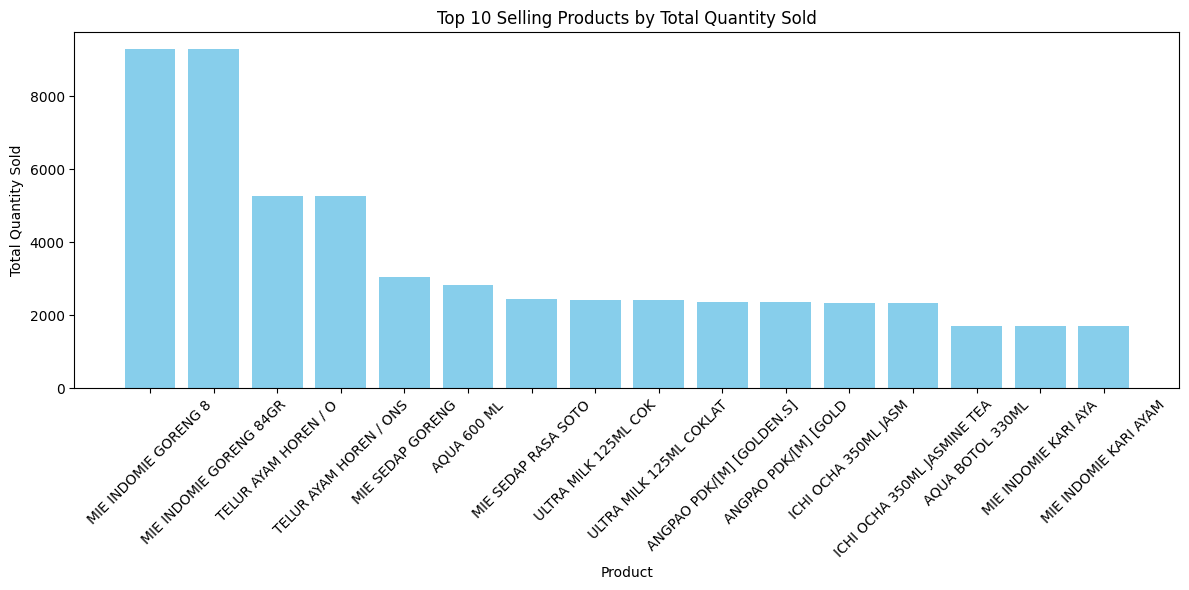

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed

# 1. Top 10 Selling Products (based on total quantity sold across all days)
top_10_selling_products = df.groupby('ITEM')['QTY'].sum().sort_values(ascending=False).head(10)

# Merge with the product names to display names instead of item codes
top_10_selling_products_names = pd.merge(top_10_selling_products.reset_index(),
                                         df[['ITEM', 'NAMA']].drop_duplicates(),
                                         on='ITEM', how='left')

print("2. Top 10 Selling Products (by Total Quantity Sold):")

# Visualization: Bar chart for top 10 selling products across all days
plt.figure(figsize=(12, 6))
plt.bar(top_10_selling_products_names['NAMA'], top_10_selling_products_names['QTY'], color='skyblue')
plt.title('Top 10 Selling Products by Total Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



3. Weekday vs Weekend Sales in January:


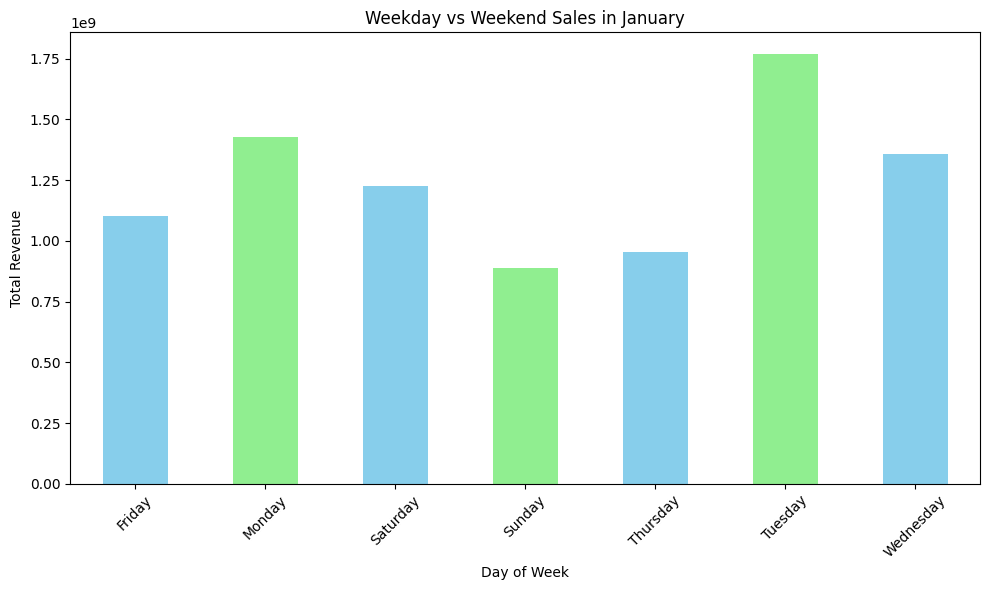

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for January
january_data = df[df['month'] == 1]

# 3. Day of the Week Insights (Comparing Weekdays vs Weekends)
january_day_of_week_sales = january_data.groupby('day_name')['revenue'].sum()

# Print sales by day of the week
print(f"\n3. Weekday vs Weekend Sales in January:")

# Visualization: Bar chart for weekday vs weekend sales
plt.figure(figsize=(10, 6))
january_day_of_week_sales.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Weekday vs Weekend Sales in January')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2.1 Market Basket Analysis Insight

In [18]:
import pandas as pd

# Assuming df is already loaded and processed
# Step 1: Create Basket for Apriori
# Group by 'NO_BKT' (transaction ID) and 'KEL' (product) and count the occurrences
basket = df.groupby(['NO_BKT', 'KEL']).size().unstack(fill_value=0)

# Convert the size count to binary (1 if product is purchased, 0 if not)
basket = (basket > 0).astype(int)

# Show the basket matrix (just a preview)

print("Basket Matrix:")
print(basket.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basket Matrix:
KEL        A BABY  A JAHIT  A TULIS  A.AGAR  A.DAPUR  ABON  ACNES  AGENDA  \
NO_BKT                                                                      
0001/0117       0        0        0       0        0     0      0       0   
0002/0117       0        0        0       0        0     0      0       0   
0003/0117       0        0        0       0        0     0      0       0   
0004/0117       0        0        0       0        0     0      0       0   
0005/0117       0        0        0       0        0     0      0       0   

KEL        AIR.M  AKANTOR  ...  VIVA  WAFER  WAFER.P  WAFERKL  WALLS  WARDAH  \
NO_BKT                     ...                                                 
0001/0117      0        0  ...     0      0        0        0      0       0   
0002/0117      0        0  ...     0      0        0        0      0       0   
0003/0117      0        0  ...     0      0        0        0      0       0   
0004/0117      0        0  ...     0      0  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Association Rules:
            antecedents         consequents  antecedent support  \
0             (B DAPUR)           (DETERJN)            0.033590   
1             (DETERJN)           (B DAPUR)            0.083607   
2             (B DAPUR)               (MIE)            0.033590   
3                 (MIE)           (B DAPUR)            0.078878   
4             (BISCPAK)           (DETERJN)            0.063600   
..                  ...                 ...                 ...   
181  (SABUN.M, SHAMPOO)           (PAMPERS)            0.039494   
182  (PAMPERS, SHAMPOO)           (SABUN.M)            0.021182   
183           (SABUN.M)  (PAMPERS, SHAMPOO)            0.087624   
184           (PAMPERS)  (SABUN.M, SHAMPOO)            0.139718   
185           (SHAMPOO)  (PAMPERS, SABUN.M)            0.082595   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.083607  0.011042    0.328723  3.931775  0.008234    1.365148   
1            

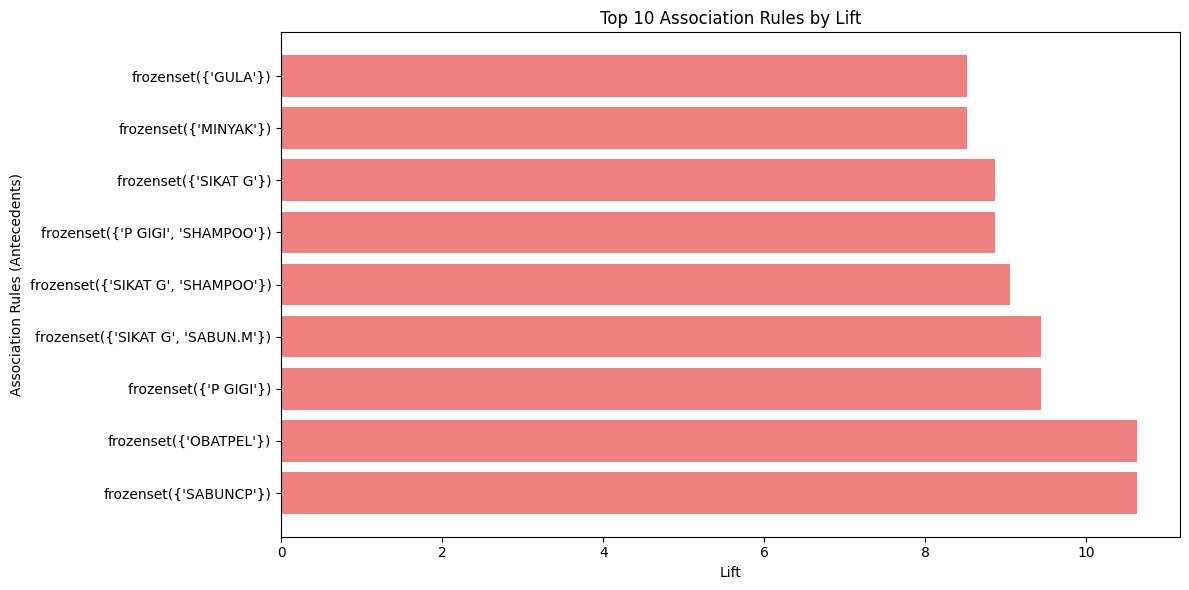

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Apply Apriori Algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Step 3: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print("\nAssociation Rules:")
print(rules)

# Visualization: Top 10 association rules based on lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

import matplotlib.pyplot as plt

# Plotting top 10 association rules by lift
plt.figure(figsize=(12, 6))
plt.barh(top_rules['antecedents'].astype(str), top_rules['lift'], color='lightcoral')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rules (Antecedents)')
plt.tight_layout()
plt.show()


# 2.2 Placement Idea

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Strong Association Rules for Placement Ideas (Confidence >= 60%, Lift >= 2):
            antecedents consequents  confidence      lift
38            (PELICIN)   (DETERJN)    0.601707  7.196880
44            (SOFTENR)   (DETERJN)    0.643722  7.699413
163  (SABUN.M, SHAMPOO)    (P GIGI)    0.611765  8.025546
164   (P GIGI, SHAMPOO)   (SABUN.M)    0.635971  7.257927
168  (SIKAT G, SABUN.M)    (P GIGI)    0.718929  9.431403
175  (SIKAT G, SHAMPOO)    (P GIGI)    0.689908  9.050686

Suggested Placement Ideas:
- Place PELICIN near DETERJN
- Place SOFTENR near DETERJN
- Place SABUN.M, SHAMPOO near P GIGI
- Place P GIGI, SHAMPOO near SABUN.M
- Place SIKAT G, SABUN.M near P GIGI
- Place SIKAT G, SHAMPOO near P GIGI


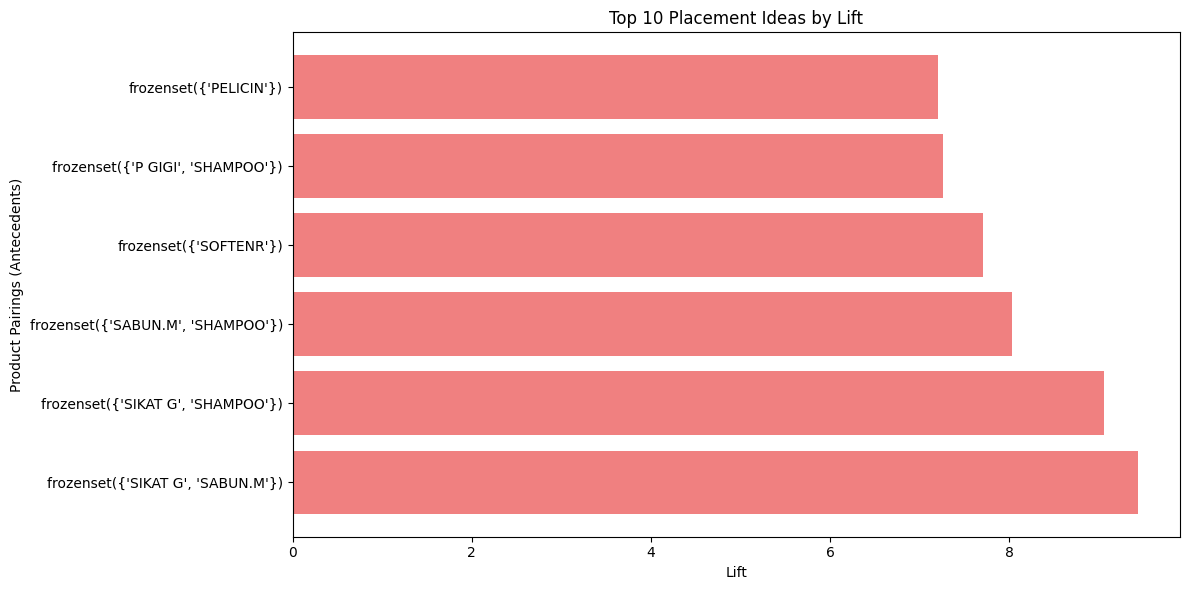

In [20]:
# Assuming you already have 'rules' from Market Basket Analysis

# Step 1: Filter strong rules based on high confidence and lift
strong_rules = rules[(rules['confidence'] >= 0.6) & (rules['lift'] >= 2.0)]

# Display strong rules
print("\nStrong Association Rules for Placement Ideas (Confidence >= 60%, Lift >= 2):")
print(strong_rules[['antecedents', 'consequents', 'confidence', 'lift']])

# Step 2: Generate actionable placement ideas
placement_ideas = []

for _, rule in strong_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    placement_ideas.append(f"Place {', '.join(antecedents)} near {', '.join(consequents)}")

# Display placement ideas
print("\nSuggested Placement Ideas:")
for idea in placement_ideas:
    print(f"- {idea}")

# Step 3: Visualizing top placement ideas based on lift
top_placement_ideas = strong_rules.sort_values(by='lift', ascending=False).head(10)

# Visualization: Top 10 placement ideas by lift
plt.figure(figsize=(12, 6))
plt.barh(top_placement_ideas['antecedents'].astype(str), top_placement_ideas['lift'], color='lightcoral')
plt.title('Top 10 Placement Ideas by Lift')
plt.xlabel('Lift')
plt.ylabel('Product Pairings (Antecedents)')
plt.tight_layout()
plt.show()
